In [1]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data-Processed/Crop_Recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,84,48,40,20.879744,82.002744,6.502985,202.935536,rice
1,97,50,36,21.770462,80.319644,7.038096,226.655537,rice
2,73,57,39,23.004459,82.320763,7.840207,263.964248,rice
3,87,55,43,26.491096,80.158363,6.980401,242.864034,rice
4,74,54,44,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,83,27,25,26.774637,66.413269,6.780064,177.774507,coffee
2196,114,20,34,27.417112,56.636362,6.086922,127.924610,coffee
2197,114,18,26,24.131797,67.225123,6.362608,173.322839,coffee
2198,115,21,30,26.272418,52.127394,6.758793,127.175293,coffee
2199,98,29,33,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

cotton         100
chickpea       100
lentil         100
mothbeans      100
coconut        100
rice           100
banana         100
orange         100
mungbean       100
papaya         100
maize          100
blackgram      100
kidneybeans    100
mango          100
pigeonpeas     100
pomegranate    100
jute           100
grapes         100
watermelon     100
apple          100
coffee         100
muskmelon      100
Name: label, dtype: int64

<AxesSubplot:>

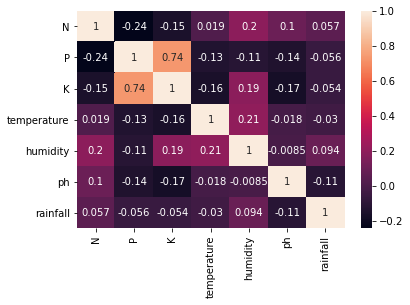

In [11]:
sns.heatmap(df.corr(), annot = True)

### Seperating features and target label

In [12]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size = 0.2, random_state = 2)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion = "entropy", random_state = 2, max_depth = 5)
DecisionTree.fit(Xtrain, Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(Ytest, predicted_values))

DecisionTrees's Accuracy is:  87.27272727272727
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.85      1.00      0.92        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.86      0.84        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       0.75      0.12      0.20        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target, cv = 5)
score

array([0.89318182, 0.89545455, 0.91363636, 0.88181818, 0.93863636])

### Saving trained Decision Tree model

In [18]:
import pickle
# Dump the trained Decision Tree Classifier with Pickle
DT_Model_pkl = open('../Models/DecisionTree.pkl', 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain, Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)
print(classification_report(Ytest, predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [20]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes, features, target, cv = 5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99090909, 0.98863636])

### Saving trained Guassian Naive Bayes model

In [21]:
# Dump the trained Guassian Naive Bayes Classifier with Pickle
NB_Model_pkl = open('../Models/NaiveBayesClassifier.pkl', 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC
SVM = SVC(gamma = 'auto')
SVM.fit(Xtrain, Ytrain)
predicted_values = SVM.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)
print(classification_report(Ytest, predicted_values))

SVM's Accuracy is:  0.12727272727272726
              precision    recall  f1-score   support

       apple       1.00      0.38      0.56        13
      banana       1.00      0.12      0.21        17
   blackgram       0.80      0.25      0.38        16
    chickpea       1.00      0.19      0.32        21
     coconut       0.00      0.00      0.00        21
      coffee       1.00      0.05      0.09        22
      cotton       1.00      0.10      0.18        20
      grapes       1.00      0.06      0.11        18
        jute       0.00      0.00      0.00        28
 kidneybeans       0.04      1.00      0.07        14
      lentil       1.00      0.04      0.08        23
       maize       0.00      0.00      0.00        21
       mango       1.00      0.04      0.07        26
   mothbeans       1.00      0.05      0.10        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.22      0.36        23
      orange       0.00      0.00      0.

In [23]:
# Cross validation score (SVM)
score = cross_val_score(SVM, features, target, cv = 5)
score

array([0.26590909, 0.22727273, 0.28409091, 0.27045455, 0.28181818])

### Saving trained Support Vector Machine model

In [24]:
# Dump the trained Support Vector Machine with Pickle
SVM_Model_pkl = open('../Models/SupportVectorMachine.pkl', 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state = 2)
LogReg.fit(Xtrain, Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(classification_report(Ytest, predicted_values))

Logistic Regression's Accuracy is:  0.9590909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.81      0.90        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.89      0.85      0.87        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       0.83      0.90      0.86        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       0.96      0.96      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [26]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg, features, target, cv = 5)
score

array([0.95681818, 0.95909091, 0.96136364, 0.94545455, 0.95227273])

### Saving trained Logistic Regression model

In [27]:
# Dump the trained Naive Bayes classifier with Pickle
LR_Model_pkl = open('../Models/LogisticRegression.pkl', 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 20, random_state = 0)
RF.fit(Xtrain, Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)
print(classification_report(Ytest, predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99772727, 0.98636364, 0.99318182, 0.99318182])

### Saving trained Random Forest model

In [30]:
# Dump the trained Naive Bayes classifier with Pickle
RF_Model_pkl = open('../Models/RandomForest.pkl', 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [31]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain)
predicted_values = XB.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)
print(classification_report(Ytest, predicted_values))

[00:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.93      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        

In [32]:
# Cross validation score (XGBoost)
score = cross_val_score(XB, features, target, cv = 5)
score

[00:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.97727273, 0.99772727, 0.99090909, 0.99090909, 0.98636364])

### Saving trained XGBoost model

In [33]:
# Dump the trained Naive Bayes classifier with Pickle
XB_Model_pkl = open('../Models/XGBoost.pkl', 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

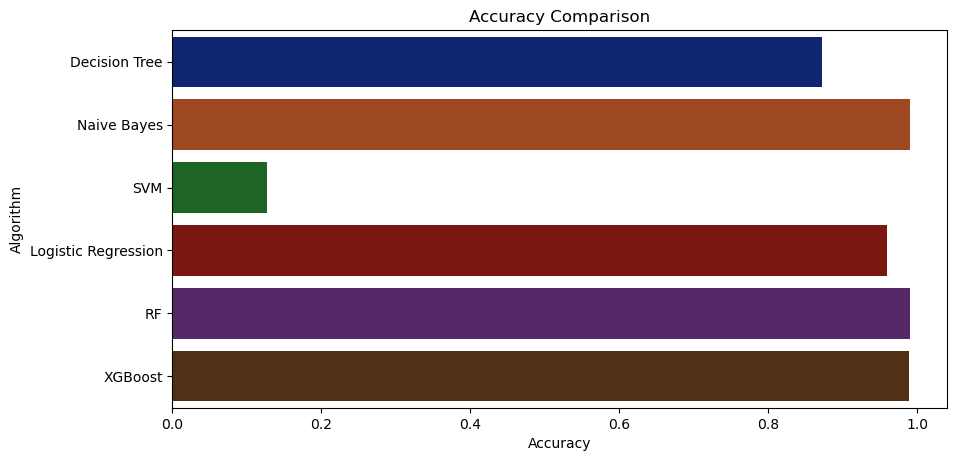

In [34]:
plt.figure(figsize = [10, 5], dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc, y = model, palette = 'dark')

In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8727272727272727
Naive Bayes --> 0.990909090909091
SVM --> 0.12727272727272726
Logistic Regression --> 0.9590909090909091
RF --> 0.990909090909091
XGBoost --> 0.9886363636363636


## Making a prediction

In [36]:
data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [37]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
